## 도형그리기
- 각 함수들은 원본 이미지에 도형을 그린다.
- cv2.line(img, pt1, pt2, color, tickness=None, lineType=None, shift):img
    - 선그리기
    - 매개변수
        - img: 그릴 대상 이미지
        - pt1, pt2: 직선의 시작/끝점. 각각 튜플(x, y)
        - color: 선색 또는 밝기 (B,G,R) 튜플 또는 정수
        - thickness: 선 두께. 기본값=1 (픽셀)
        - lineType: 선 타입. cv2.LINE_4, cv2.LINE_8(기본값), cv2.LINE_AA(부드러운 형태) 중 선택. 일직선이 아니면 LINE_AA를 준다.
    - 반환값
       - 선을 그린 image (ndarray) 반환 (모든 도형함수 동일)

- cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None):img
- cv2.rectangle(img, rec, color, thickness=None, lineType=None):img
    - 사각형 그리기
    - 매개변수
        - pt1, pt2: 좌측상단, 우측하단 좌표. 튜플 (x, y)
        - rec: 사각형의 위치정보(x, y, w, h) 튜플지정.
        - thickness: 도형에서는 -1을 주면 내부를 채운다. 


- cv2.circle(img, center, radius, color, thickness=None, lineStyle=None): img
    - 원 그리기. 원의 lineType은 LINE_AA (안티 알리애싱)을 주면 부드럽게 그려진다. 
    - 매개변수
        - center: 원의 중심좌표. 튜플 (x,y)
        - radius: 반지름

- CV2.polylines(img, pts, isClosed, color, thinkness=None, lineType=None): img
    - 다각형을 그린다.
    - 매개변수
        - pts: 다각형의 외곽점들의 좌표배열. ndarray 리스트 (ex: \[np.array[[10,10],[50,50], [10,10]])\] => 리스트로 감싸서 넣는다.
        - isClosed: bool. 폐곡선 여부. 시작점과 끝점을 연결할지 여부.

- cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None): img
    - 문자열을 출력. 영문/숫자만 지원(한글 지원안함.)
    - 매개변수
        - text: 출력할 문자열
        - org: 이미지에서 문자열을 출력할 위치. 좌측 하단의 좌표를 튜플로 지정 (x,y)
        - fontFace: 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택
        - fontScale: 폰트 크기 확대/축소 비율. 1이 기본. 1을 기준으로 정한다.

In [1]:
import cv2
import numpy as np
import pandas as pd

In [10]:
# 400 X 400의 흰색 color 영상을 만든다. 도화지를 만드는 것이다. 도형을 그릴 영상은 어떤 것을 사용해도 무관하다.
img = np.full(shape = (600, 500, 3), fill_value = 255, dtype = 'uint8')

# 선
cv2.line(img, pt1 = (50, 50), pt2 = (200, 50), color = (0, 0, 125), thickness = 1)
cv2.line(img, pt1 = (250, 50), pt2 = (450, 80), color = (0, 0, 125), thickness = 5, lineType = cv2.LINE_AA)

# 사각형
cv2.rectangle(img, pt1 = (50, 100), pt2 = (200, 180), color = (0, 125, 0), thickness = 10)
cv2.rectangle(img, rec = (250, 100, 150, 80), color = (0, 125, 0), thickness = -1)

# 원
cv2.circle(img, center = (100, 250), radius = 50, color = (125, 0, 0), thickness = 5)
cv2.circle(img, center = (240, 250), radius = 50, color = (125, 0, 0), thickness = 5, lineType = cv2.LINE_AA)
cv2.circle(img, center = (380, 250), radius = 50, color = (125, 0, 0), thickness = -1, lineType = cv2.LINE_AA)

# 다각형
# 연결할 좌표들의 list 생성
pts1 = np.array([[50, 350], [50, 400], [200, 450], [230, 330]])
pts2 = np.array([[300, 350], [300, 400], [450, 450], [480, 330]])
cv2.polylines(img, pts = [pts1], isClosed = True, color = (125, 0, 125), thickness = 5)
cv2.polylines(img, pts = [pts2], isClosed = False, color = (125, 0, 125), thickness = 5)

# 문자열
text = 'Hello World! #2023.02.15#'
cv2.putText(img, text = text, org = (50, 530), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1, color = (0, 0, 0), lineType = cv2.LINE_AA)

cv2.imshow('frame', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Lenna Image에 텍스트 그리기

In [63]:
img = cv2.imread('images/lenna.bmp')
img.shape

(512, 512, 3)

In [13]:
img_frame = np.full(shape = (70, 512, 3), fill_value = 255, dtype = 'uint8')
img_lenna = cv2.imread('images/lenna.bmp')

img = np.concatenate([img_lenna, img_frame])

text = 'Lenna Forsen'
cv2.putText(img, text = text, org = (130, 560), fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 1, color = (0, 0, 0), lineType = cv2.LINE_AA)

cv2.imshow('frame', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
import matplotlib as mpl
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontext = 'ttf')

In [19]:
malgun_list = [ f for f in font_list if 'malgun' in f.lower() ]
malgun_list

['C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\malgunbd.ttf']

In [57]:
from PIL import ImageFont, ImageDraw, Image

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font = ImageFont.truetype(font = font_path, size = 20)

img = np.full((100, 400, 3), fill_value = 230, dtype = 'uint8')
img_pil = Image.fromarray(img)
print(type(img_pil))

<class 'PIL.Image.Image'>


In [58]:
# Image instance에 그림을 그릴 수 있는 기능을 제공하는 instance를 생성한다. 이 instance는 ImageDraw class로 생성한다.
draw = ImageDraw.Draw(img_pil)
print(type(draw))

<class 'PIL.ImageDraw.ImageDraw'>


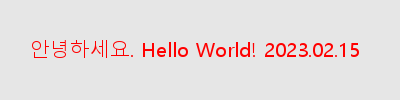

In [59]:
# 이제 ImageDraw instance를 사용해 한글을 영상에 출력해보자.
# xy는 글을 작성할 좌표이고, text는 문자열을 입럭받는다. 그리고 fill은 색을 설정한다. 이때 (R, G, B)라는 점에 주의한다.
# 마지막으로 font는 우리가 위에서 가지고 온 글씨체를 입력하면 된다.
# PIL은 instance를 이용하기 때문에 마지막에 instance 이름만 작성하면 된다.
text = '안녕하세요. Hello World! 2023.02.15'

draw.text(xy = (30, 35), text = text, fill = (255, 0, 0), font = font)

img_pil

In [61]:
# 영상 instance는 ndarray로 변환할 수 있다. 그래서 위의 영상 instance를 ndarray로 변환해 OpenCV에서 사용해보자.
img_opencv = np.array(img_pil)
cv2.imshow('frame', img_opencv[:, :, ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 Crop
- open cv는 이미지를 numpy의 ndarray를 이용해 연산하기 때문에 image의 특정 영역의 좌표만 알면 그 영역을 잘라낼 수 있다.

In [63]:
import matplotlib.pyplot as plt

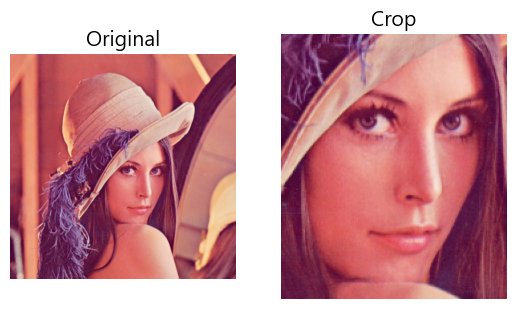

In [71]:
img = cv2.imread('images/lenna.bmp')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_crop = img_RGB[200:400, 200:370]

plt.subplot(1, 2, 1)
plt.imshow(img_RGB)
plt.title('Original', fontsize = 15)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_crop)
plt.title('Crop', fontsize = 15)
plt.axis('off')

plt.show()

## 영상의 기하학적 변환
- 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업

### 이동 변환 (Translation Transformation)
- 가로 또는 세로 방향으로 영상을 이동시키는 변환
- X축과 Y축 방향으로 이동 변위를 지정
- 그림을 가로(X축) 으로 a 만큼 , 세로(Y축)으로 b만큼 이동할 경우
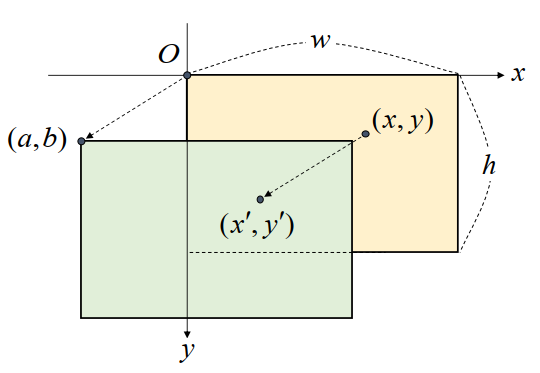

$$
\,각\,좌표들을 (a,b)\,만큼\,더한다.
\large{
    \begin{cases}
    x'=x+a\\
    y'= y+b
    \end{cases}
}
$$

<hr>
$$
행렬곱으로\,표현\\
\large{
    \begin{bmatrix}
    x'\\
    y'
    \end{bmatrix}=
    \begin{bmatrix}
    1 & 0 & a \\
    0 & 1 & b
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    x\\y\\1
    \end{bmatrix}
}\\
이동을\,위한\,2\times3\,Affine\,변환\,행렬 \\
$$

- 이동을 위한 2 X 3 Affine 변환 행렬

$$
\begin{bmatrix}
1 & 0 & a \\
0 & 1 & b
\end{bmatrix}
$$

- cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)
    - 매개변수
        - src: 원본 영상
        - M: $2\times3$ 어파인 변환 행렬. 실수형
        - dsize: 결과 영상의 크기를 (w, h) 튜플로 지정. (0,0) 이면 같은 크기
        - flags: 보간법
        - borderMode: 영상이 이동해서 생기는 빈공간을 채우는 방식. default: cv2.BORDER_CONSTANT (검정색으로 채운다.)
            - borderValue: cv2.BORDER_CONSTANT 일때 채울 색. (B, G, R) 로 지정

In [75]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

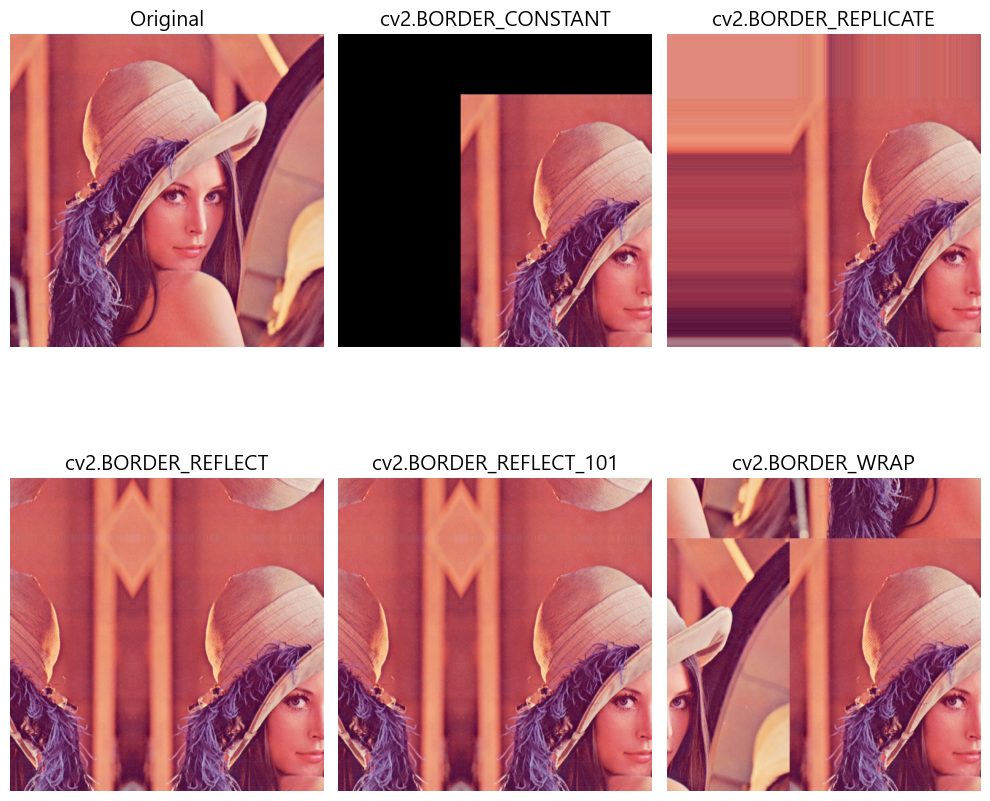

In [114]:
a, b = 200, 100
aff_matrix = np.array([[1, 0, a], 
                       [0, 1, b]], dtype = 'float64')

img = cv2.imread('images/lenna.bmp')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_RGB)
plt.title('Original', fontsize = 15)
plt.axis('off')

borderMode_list = [cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_REFLECT_101, cv2.BORDER_WRAP]
title_list = ['cv2.BORDER_CONSTANT', 'cv2.BORDER_REPLICATE', 'cv2.BORDER_REFLECT', 'cv2.BORDER_REFLECT_101', 'cv2.BORDER_WRAP']
i = 2

for borderMode, title in zip(borderMode_list, title_list):
    img_trans = cv2.warpAffine(src = img_RGB, 
                               M = aff_matrix, 
                               dsize = (0, 0), 
                               borderMode = borderMode)
    
    plt.subplot(2, 3, i)
    i += 1
    plt.imshow(img_trans)
    plt.title(title, fontsize = 15)
    plt.axis('off')

plt.tight_layout()
plt.show()

### 전단 변환(Shear transformation)
- 직사각형 형태의 영상을 한쪽 방향으로 밀어서 평행사변형 모양으로 변형되는 변환으로 층밀림 변환이라고도 한다.
    - 한축 방향으로 이동하는데 기준축에 비례해서 다르게 이동한다.
- X축과 Y축에 대해 따로 정의 한다.
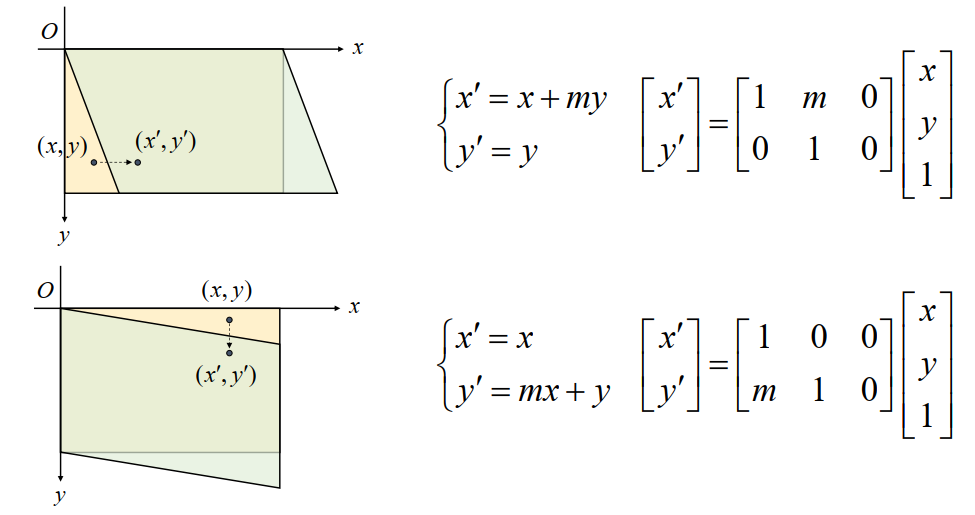
<center>m: 비율</center>

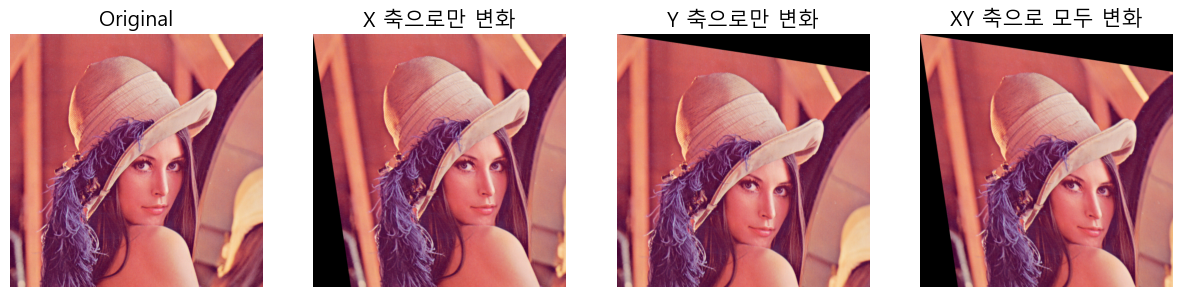

In [116]:
rate = 0.15
aff_matrix_shear_x = np.array([[1, rate, 0], 
                               [0, 1, 0]], dtype = 'float64')
aff_matrix_shear_y = np.array([[1, 0, 0], 
                               [rate, 1, 0]], dtype = 'float64')
aff_matrix_shear_xy = np.array([[1, rate, 0], 
                                [rate, 1, 0]], dtype = 'float64')

img = cv2.imread('images/lenna.bmp')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_shear_x = cv2.warpAffine(src = img_RGB, M = aff_matrix_shear_x, dsize = (0, 0))
img_shear_y = cv2.warpAffine(src = img_RGB, M = aff_matrix_shear_y, dsize = (0, 0))
img_shear_xy = cv2.warpAffine(src = img_RGB, M = aff_matrix_shear_xy, dsize = (0, 0))

plt.figure(figsize = (15, 10))

plt.subplot(1, 4, 1)
plt.imshow(img_RGB)
plt.title('Original', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_shear_x)
plt.title('X 축으로만 변화', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_shear_y)
plt.title('Y 축으로만 변화', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_shear_xy)
plt.title('XY 축으로 모두 변화', fontsize = 15)
plt.axis('off')

plt.show()

In [ ]:
# 영상이 잘리지 않도록 처리해보자.

In [117]:
x_rate, y_rate = 0.1, 0.3
aff_matrix_shear = np.array([[1, x_rate, 0], 
                             [y_rate, 1, 0]], dtype = 'float64')

img = cv2.imread('images/lenna.bmp')

width, height = img.shape[1], img.shape[0]
new_width = width + int(x_rate * height)
new_height = height + int(y_rate * width)

img_result = cv2.warpAffine(img, M = aff_matrix_shear, dsize = (new_width, new_height))

cv2.imshow('frame', img_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 크기 조절(확대/축소 - Resize)
- cv2.resize(src, dsize\[, fx, fy, interpolation\])
    - 매개변수
        - src: 원본 이미지 
        - dsize: 조절할 이미지 크기 (width, height)
        - fx, fy: 상대적 크기로 지정한다. (dsize는 0,0 으로 설정한다. dsize를 설정하면 dsize가 우선한다.)
        - interpolation: 보간 방법
             - 크기를 조절할 때 본래는 없는 값을 메우는 작업이 필요한데, 이를 interpolation(보간법)이라고 한다.
    - 반환값
        - ndarray: resize된 이미지반환
        
### Interpolation 상수
- cv2.INTER_NEAREST: 이웃보간법. nearest neighbor interpolation이라고도 하며, 주변 이웃 pixel값을 가져와 빈공간을 채운다. 가장 빠르지만 화질이 좋지 않다.
- cv2.INTER_LINEAR: 쌍 선형보간법.(2x2 이웃픽셀을 계산해서 만든다.) resize의 default 방식. 연산속도가 빠르고 화질도 좋아서 많이 사용된다.
- cv2.INTER_CUBIC - 바이큐빅 보간법.(4x4 이웃픽셀을 계산해서 만든다.)  INTER_LINEAR보다 화질이 좋고 lancozs보다 계산량이 적어 많이 사용된다.
- cv2.LANCZOS4 - Lanczos보간법.(8x8 이웃픽셀을 계산해서 만든다.) 가장 부드럽게 값을 메우지만 연산이 많이 필요하다.
- cv2.INTER_AREA: 영역보간법. 크기를 **축소**할 때 많이 사용한다. 확대할 때는 nearest neighbor와 유사하다.
- 일반적으로 쌍 선형보간법(INTER_LINEAR)을 많이 쓴다.
    - 이미지 확대: 바이큐빅, 쌍 선형 보간법을 가장 많이 사용
    - 이미지 축소: 영역 보간법을 많이 사용.
    
### Interpolation 비교
- **upsampling**
    - nearest와 area는 계단현상이 발생
    - linear는 edge가 smooth된 효과가 발생
    - cubic과 lancozs는 edge가 shapen되는 효과
- **downsampling**
    - area는 pixel 관계에 따라 resampling하기 때문에 상대적으로 부드럽게 변환된다.
    - 나머지는 계단현상이 많이 발생한다.

In [139]:
img = cv2.imread('images/rose.bmp')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [140]:
# 먼저 영상의 height와 width를 추출하자.
height, width = img_RGB.shape[:2]

In [141]:
# 크기를 작게 줄이는 것과 크게 늘리는 것 두 가지를 모두 해보자.
small_size = int(width * 0.5), int(height * 0.5)
big_size = int(width * 2), int(height * 2)

In [150]:
img_small = cv2.resize(img, 
                       dsize = small_size, 
                       interpolation= cv2.INTER_AREA)
img_big = cv2.resize(img, 
                     dsize = big_size, 
                     interpolation= cv2.INTER_NEAREST)

In [154]:
cv2.imshow('Original', img)
cv2.imshow('Small', img_small)
cv2.imshow('Big', img_big)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [155]:
# parameter fx와 fy의 기능 확인
# parameter fx와 fy를 사용하기 위해서는 dsize = (0, 0)을 입력해야 한다.
# fx와 fy의 값을 같게 설정해야 원본과 같은 비율의 영상이 만들어진다. 두 값이 다를 경우 비율이 원본과 다르게 될 것이다.
# dsize를 사용할지 fx, fy를 사용할지는 편한대로 하면 된다.
img_small = cv2.resize(img, dsize = (0, 0), fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)
img_big = cv2.resize(img, dsize = (0, 0), fx = 2, fy = 2, interpolation = cv2.INTER_AREA)

cv2.imshow('Small', img_small)
cv2.imshow('Big', img_big)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 대칭변환(Flip)
- cv2.flip(src, flipCode)
- 매개변수
    - src: 원본소스
    - flipCode: 대칭방향지정
        - 양수: 좌우대칭
        - 0: 상하대칭
        - 음수: 좌우/상하 대칭


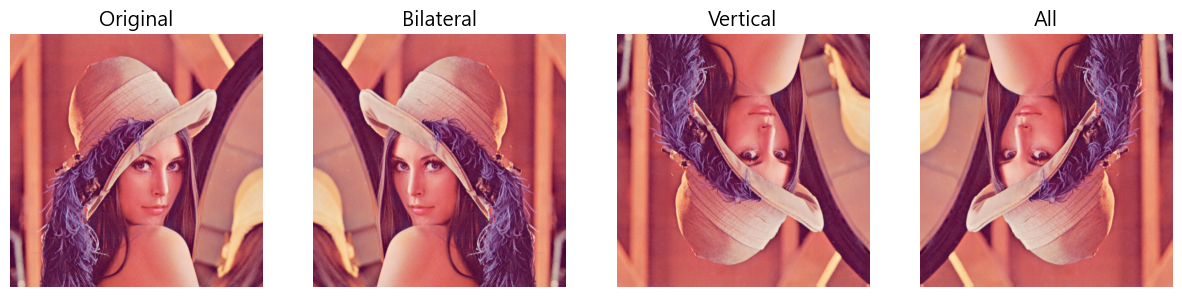

In [159]:
img = cv2.imread('images/lenna.bmp')

img_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bilaterl = cv2.flip(img_original, 1)
img_vertical = cv2.flip(img_original, 0)
img_all = cv2.flip(img_original, -1)

plt.figure(figsize = (15, 10))

plt.subplot(1, 4, 1)
plt.imshow(img_original)
plt.title('Original', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_bilaterl)
plt.title('Bilateral', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_vertical)
plt.title('Vertical', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_all)
plt.title('All', fontsize = 15)
plt.axis('off')

plt.show()

## 회전(Rotate)
- cv.rotate(src, rotateCode): img
    - 매개변수
        - src: 회전시킬 원본이미지
        - rotateCode: 회전각도 상수
            - **ROTATE_90_CLOCKWISE**: 시계방향 90도
            - **ROTATE_180**: 180도 회전
            - **ROTATE_90_COUNTERCLOCKWISE**: 반시계방향 90도(시계방향 270도)
- 원하는 각도만큼 회전.
    - 얼마나 회전할지 getRotationMatrix2D()를 이용해 어파인 변환 행렬을 생성.
    - **warpAffine()**을 이용해 회전 처리
    - **getRotationMatrix2D(center, angle, scale)**
        - 2x3 회전을 위한 어파인 변환 행렬 생성
        - center: 회전의 중심점 좌표, 튜플형태로 지정
        - angle: 중심점을 기준으로 회전할 각도(양수: 반시계방향, 음수: 시계방향)
        - scale: 이미지 확대 및 축소 비율
    - **warpAffine(src, M, dsize)**
        - 회전 처리
        - src: 회전시킬 대상 이미지 배열.
        - M:  getRotationMatrix2D()가 반환한 어파인 변환 행렬을 사용
        - dsize: 출력이미지 크기        

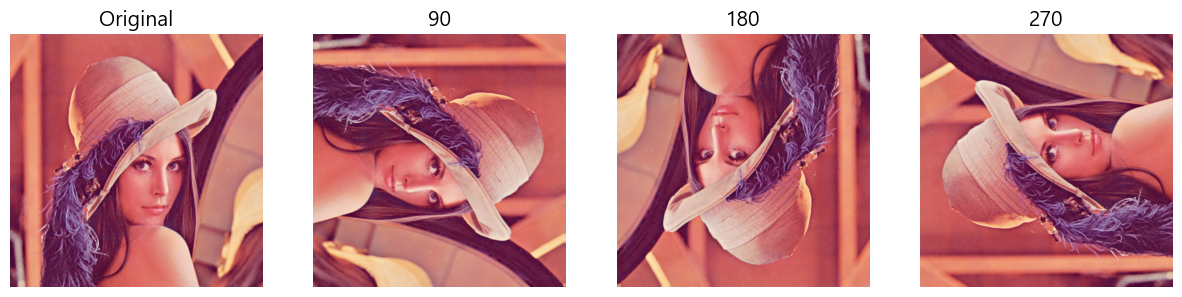

In [160]:
img = cv2.cvtColor(cv2.imread('images/lenna.bmp'), cv2.COLOR_BGR2RGB)

img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
img_180 = cv2.rotate(img, cv2.ROTATE_180)
img_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.figure(figsize = (15, 10))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_90)
plt.title('90', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_180)
plt.title('180', fontsize = 15)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_270)
plt.title('270', fontsize = 15)
plt.axis('off')

plt.show()

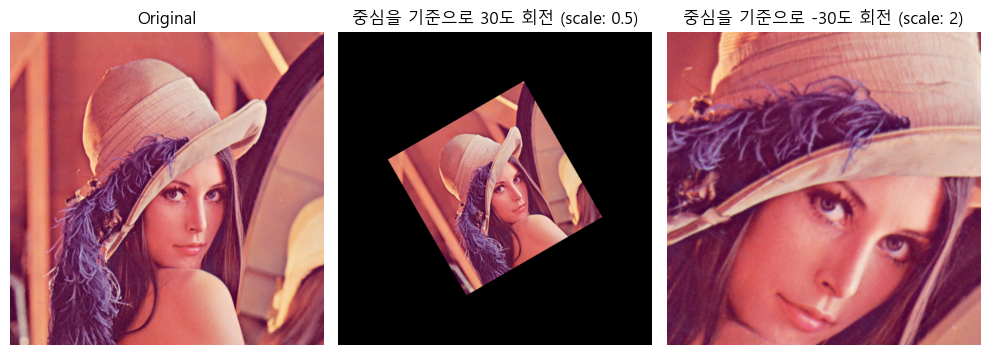

In [174]:
angle1, angle2 = 30, -30
height, width = img.shape[:2]
center_coor = int(width / 2), int(height / 2)

rotate_matrix1 = cv2.getRotationMatrix2D(center = center_coor, 
                                        angle = angle1, 
                                        scale = 0.5)
rotate_matrix2 = cv2.getRotationMatrix2D(center = center_coor, 
                                        angle = angle2, 
                                        scale = 2)

img_original = cv2.cvtColor(cv2.imread('images/lenna.bmp'), cv2.COLOR_BGR2RGB)
img_30_center = cv2.warpAffine(img_original, rotate_matrix1, (0, 0))
img__30_center = cv2.warpAffine(img_original, rotate_matrix2, (0, 0))

plt.figure(figsize = (10, 15))

plt.subplot(1, 3, 1)
plt.imshow(img_original)
plt.title('Original', fontsize = 12)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_30_center)
plt.title('중심을 기준으로 30도 회전 (scale: 0.5)', fontsize = 12)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img__30_center)
plt.title('중심을 기준으로 -30도 회전 (scale: 2)', fontsize = 12)
plt.axis('off')

plt.tight_layout()
plt.show()